In [1]:
# Importing All the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Displaying all the rows and columns in a dataframe
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
# Importing Training Data
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(18208, 12)


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [3]:
# Checking whether their is any Null values 
data.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

Text(0, 0.5, 'Frequency')

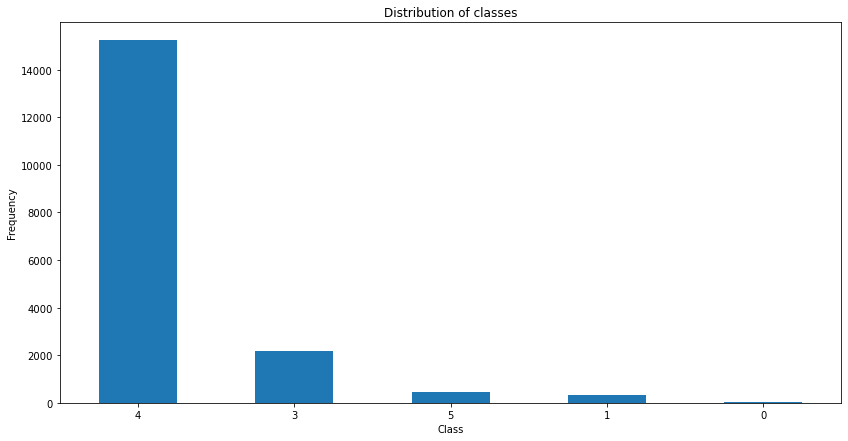

In [4]:
# Checking Whether it is a Imbalanced Dataset or not
classes = pd.value_counts(data['popularity'], sort = True)
classes.plot(kind='bar', rot=0,figsize=(14,7))
plt.title("Distribution of classes")
plt.xticks(range(5))
plt.xlabel("Class")
plt.ylabel("Frequency")


- It is a Imbalanced Dataset of having Majority of class = 4


In [5]:
# Importing Testing Data 
test = pd.read_csv('test.csv')
print(test.shape)
data.head()

(12140, 11)


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


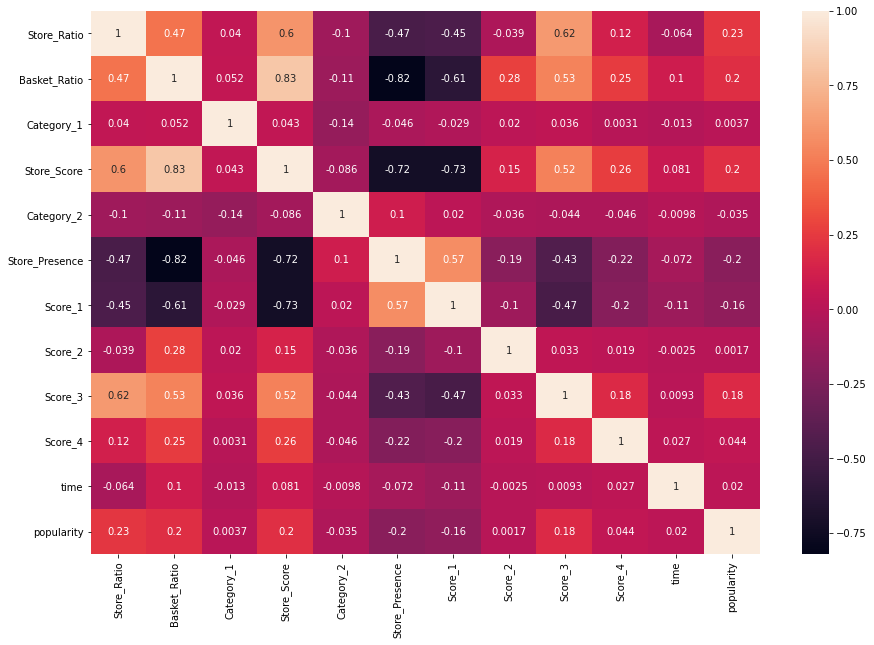

In [6]:
# Ploting Correlation of training data in a Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(),annot=True,)
plt.show()

- It came to Know that Correlation of Store_Score and Basket_Ration has greater than "0.8"

In [7]:
# Removing Store_Score feature
data = data.drop('Store_Score',axis=1)
data.head()

,Store_Ratio,Basket_Ratio,Category_1,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [8]:
# Removing Store_Score feature for testing data 
test = test.drop('Store_Score',axis=1)
print(test.shape)
test.head()

(12140, 10)


,Store_Ratio,Basket_Ratio,Category_1,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


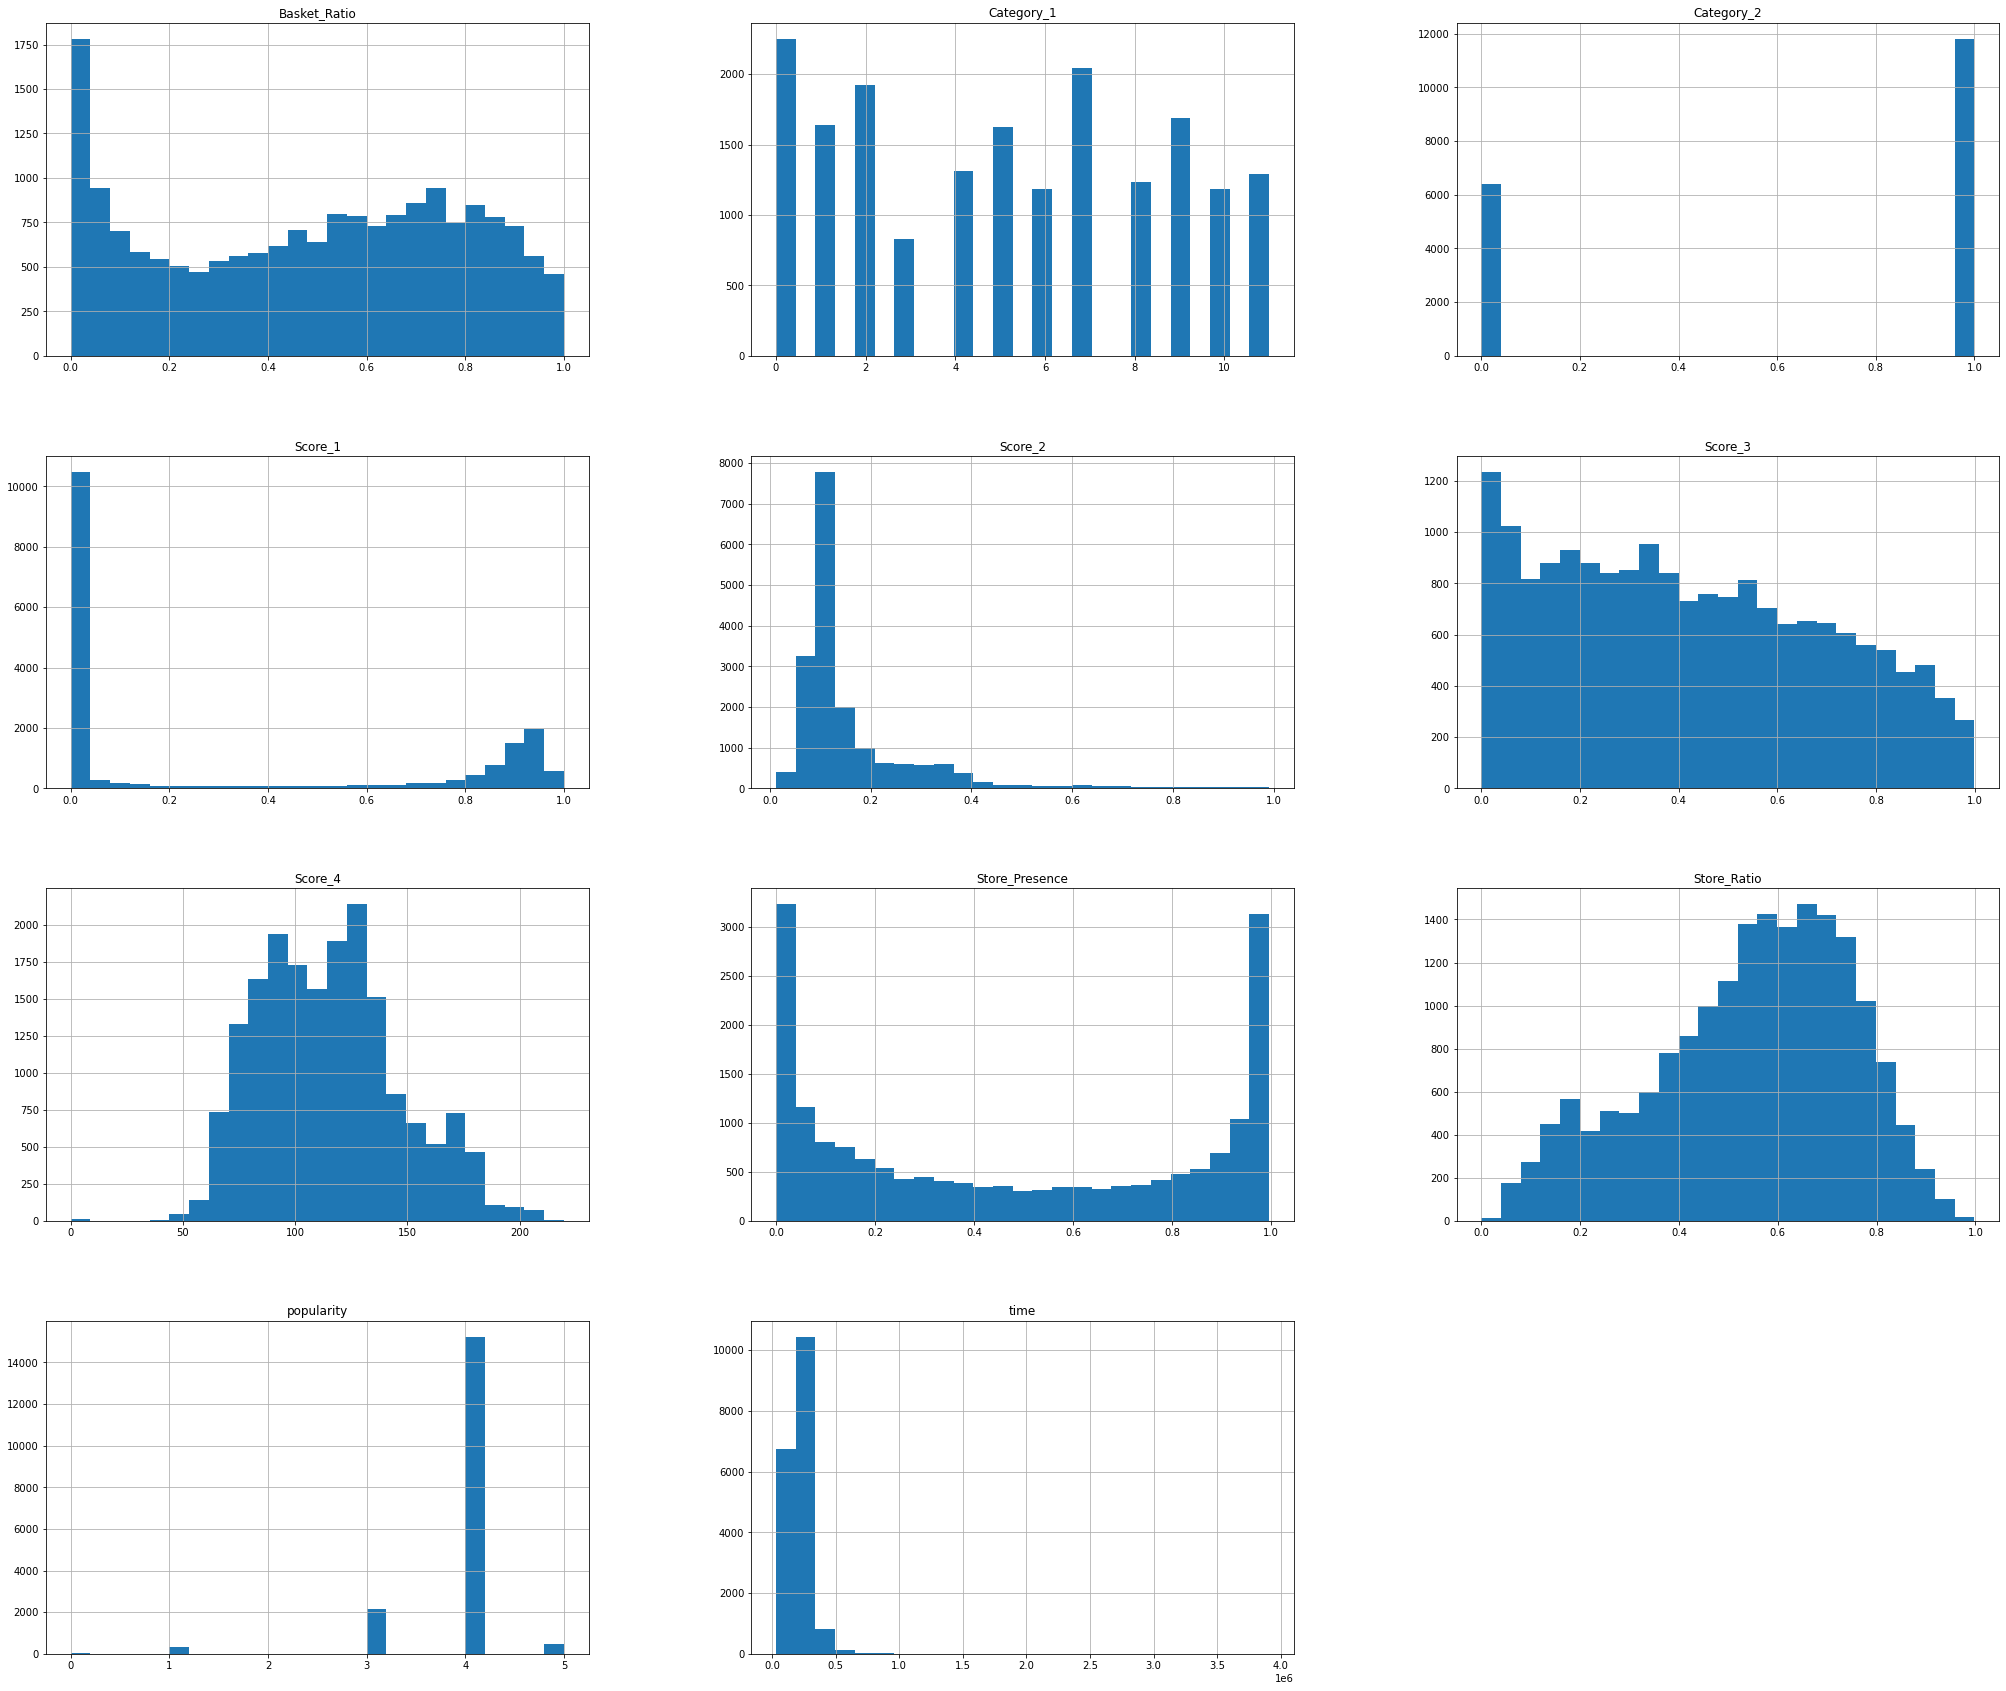

In [9]:
# Checking Distributions of Features 
data.hist(bins=25,figsize=(35,30))
plt.show()

- We are Removing Time feature because time doesn't effect the popularity level (Target variable)

In [10]:
# Removing Time Feature on training Dataset
data = data.drop('time',axis=1)
data.head()

,Store_Ratio,Basket_Ratio,Category_1,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,popularity
0,0.407,0.00380,2,1,0.9920,0.944,0.0988,0.1100,113.911,4
1,0.234,0.10500,0,1,0.9440,0.900,0.1290,0.0382,76.332,4
2,0.668,0.72600,9,1,0.0387,0.000,0.1340,0.4530,124.075,4
3,0.184,0.00561,4,1,0.8490,0.931,0.1110,0.0641,79.037,5
4,0.231,0.13100,6,1,0.9370,0.000,0.1090,0.0677,109.560,3


In [11]:
# Removing Time Feature on testing Dataset
test = test.drop('time',axis=1)
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4
0,0.164,0.994,1,0,0.12400,0.99100,0.7890,0.00001,127.602
1,0.586,0.636,4,1,0.00208,0.32200,0.1070,0.35500,136.337
2,0.457,0.743,0,1,0.40400,0.00931,0.2010,0.68800,154.902
3,0.423,0.748,5,1,0.03000,0.22100,0.1690,0.42800,93.977
4,0.802,0.756,2,0,0.08430,0.00765,0.0521,0.96300,131.715


In [12]:
# Independent and Dependent Variables 
dataset = data.copy()
x = dataset.drop('popularity',axis=1)
y = dataset['popularity']

In [13]:
# Train-Test split  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

We have Performed many Classification algorithms like Logistic Regression, Decision Trees, Naive bayes, Support vector machines, adaboost, catboost, XGboost , Easyensemble, Bagging Classifier But Random Forest worked well on this dataset  

### Random Forest

In [14]:
# Random forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

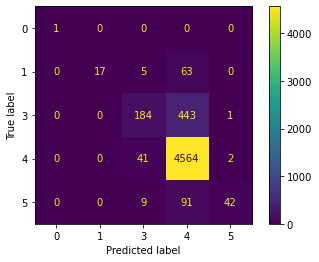

In [15]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix,accuracy_score, log_loss, classification_report
plot_confusion_matrix(rand,x_test,y_test)

In [16]:
# Accuracy and Logloss Score
print("accuracy : {}".format(accuracy_score(y_test,rand.predict(x_test))))
print("logloss : {}".format(log_loss(y_test,rand.predict_proba(x_test))))
print(classification_report(y_test,rand.predict(x_test),labels=[0,1,3,4,5]))

accuracy : 0.8801025077796083
logloss : 0.5398175922414326
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.20      0.33        85
           3       0.77      0.29      0.42       628
           4       0.88      0.99      0.93      4607
           5       0.93      0.30      0.45       142

    accuracy                           0.88      5463
   macro avg       0.92      0.56      0.63      5463
weighted avg       0.87      0.88      0.85      5463



We performed Hyper parameter tuning on Random forest and we found that their is not much change in model performance   when we used Randomized and GridsearchCV on max_depth, max_leaf no but on n_estimators their is a change in Models performance 

When we keep n_estimators = 1150 Random Forest is performed well.

In [17]:
# Random forest Classifier with n_estimators = 1150
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=1150)
rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1150)

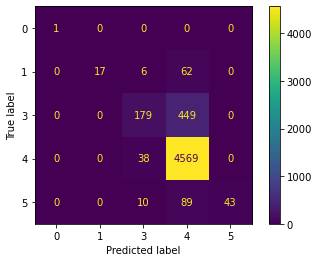

In [18]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix,accuracy_score, log_loss, classification_report
plot_confusion_matrix(rand,x_test,y_test)

In [19]:
# Accuracy and Logloss Score
print("accuracy : {}".format(accuracy_score(y_test,rand.predict(x_test))))
print("logloss : {}".format(log_loss(y_test,rand.predict_proba(x_test))))
print(classification_report(y_test,rand.predict(x_test),labels=[0,1,3,4,5]))

accuracy : 0.8802855573860516
logloss : 0.3879096486424942
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.20      0.33        85
           3       0.77      0.29      0.42       628
           4       0.88      0.99      0.93      4607
           5       1.00      0.30      0.46       142

    accuracy                           0.88      5463
   macro avg       0.93      0.56      0.63      5463
weighted avg       0.88      0.88      0.85      5463



In [20]:
# Fitting them to the Original Training data
from sklearn.ensemble import RandomForestClassifier
rand_final = RandomForestClassifier(n_estimators=1150)
rand_final.fit(x,y)

RandomForestClassifier(n_estimators=1150)

In [23]:
# Converting Into the Submission File
sub1 = pd.DataFrame(rand_final.predict_proba(test),columns=[0,1,3,4,5])
sub1.head()

,0,1,3,4,5
0,0.0,0.032174,0.740870,0.191304,0.035652
1,0.0,0.006957,0.029565,0.956522,0.006957
2,0.0,0.005217,0.065217,0.918261,0.011304
3,0.0,0.006957,0.049565,0.914783,0.028696
4,0.0,0.000000,0.000000,1.000000,0.000000


### Performing Oversampling

In [24]:
# Importing Libraries
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [25]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x,y)

In [26]:
x1 =X_res.copy()
x1['popularity'] = y_res.values

Text(0, 0.5, 'Frequency')

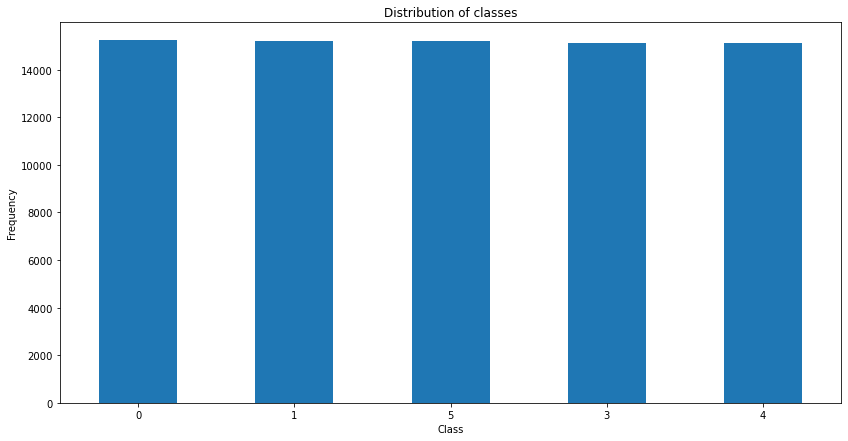

In [27]:
# Checking The Frequency of classes 
classes = pd.value_counts(x1['popularity'], sort = True)
classes.plot(kind='bar', rot=0,figsize=(14,7))
plt.title("Distribution of classes")
plt.xticks(range(5))
plt.xlabel("Class")
plt.ylabel("Frequency")

Now it Becomes Balanced Dataset

In [29]:
print(x1.shape)
x1.head()

(75871, 10)


,Store_Ratio,Basket_Ratio,Category_1,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,popularity
0,0.407,0.00380,2,1,0.9920,0.944,0.0988,0.1100,113.911,4
1,0.234,0.10500,0,1,0.9440,0.900,0.1290,0.0382,76.332,4
2,0.668,0.72600,9,1,0.0387,0.000,0.1340,0.4530,124.075,4
3,0.184,0.00561,4,1,0.8490,0.931,0.1110,0.0641,79.037,5
4,0.231,0.13100,6,1,0.9370,0.000,0.1090,0.0677,109.560,3


### Performing RandomForest 

In [32]:
# train test split on oversampling data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.35,random_state=20)

In [33]:
# Random forest Classifier on Oversampling
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

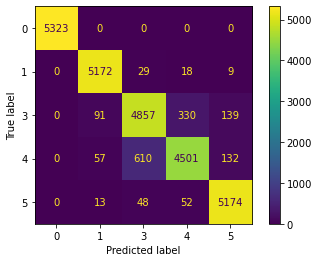

In [34]:
# Ploting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand,x_test,y_test)
plt.show()

### Hyperparameter Tuning 

In [35]:
# Using Randomized Search CV
parameters = { "n_estimators": np.arange(100,560,50),
               "max_features": np.arange(1,13,1),
               "max_leaf_nodes": np.arange(1,21,1),
               "max_depth": np.arange(1,21,1)
               }
from sklearn.model_selection import RandomizedSearchCV
rand = RandomForestClassifier(random_state=0)
rand_reg = RandomizedSearchCV(rand,parameters,scoring='roc_auc_ovr',cv=5)
rand_reg.fit(x_train,y_train)

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/pa

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/pa

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/pa

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/joblib/pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])},
                   scoring='roc_auc_ovr')

In [36]:
rand_reg.best_params_

{'n_estimators': 450, 'max_leaf_nodes': 18, 'max_features': 7, 'max_depth': 20}

In [37]:
# Checking Training Score
rand_reg.score(x_train,y_train)

0.860484897688529

In [38]:
# Checking Testing Score
rand_reg.score(x_test,y_test)

0.8564875193457331

I fitted this model on our oversampled data and submitted the file but the model performance of this model is less compared to the model performance before oversampling 

- The Logloss score of Random Forest after oversampling and applied Hyperparameter tuning is '0.50581'
- The Logloss score of Random Forest Before oversampling and applied Hyperparameter tuning is '0.36049'
- So I went with Random Forest Before oversampling

In [39]:
# Converting our Submission1 dataframe to CSV file
sub1.to_csv('final_submission.csv',index=False)